In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

Matplotlib created a temporary cache directory at /tmp/matplotlib-yp1aziw8 because the default path (/nashome/j/jbateman/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


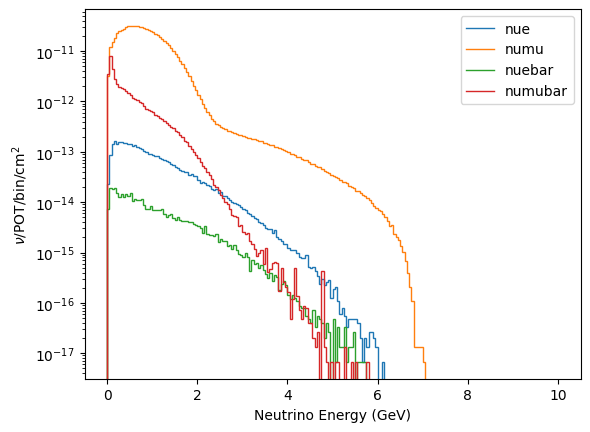

In [11]:

# From /pnfs/uboone/persistent/uboonebeam/bnb_gsimple/bnb_gsimple_fluxes_01.09.2019_463_hist/readme.txt:
#       
#       To normalize to nu/POT/bin/cm2 apply the scale factor:
#       scale_factor=1/(4997.*5e8)/(256.35*233.);

barn = 1e-28 # m2
fbarn = 1e-15*barn # m2
fbarn = fbarn * 1e4 # cm2

nu_flavour = 'numu' # PDG code for nu_mu

flux_file = uproot.open('/exp/uboone/app/users/jbateman/workdir/DarkNews/Trident/data/flux/bnb/MCC9_FluxHist_volTPCActive_wparent.root')

flux_dict = {}

for flavour in ['nue', 'numu', 'nuebar', 'numubar']:
    hist = flux_file[f'hE{flavour}_cv']

    # Normalisation scale factor
    sf = 1/(4997.*5e8)/(256.35*233.)
    values = hist.values() *  sf  # units: nu/POT/bin/cm2
    flux_dict[flavour] = values
    edges = hist.axis().edges()
    plt.stairs(values, edges, label=f'{flavour}')

flux_dict['bins'] = edges
plt.legend()
plt.yscale('log')
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel(r'$\nu$/POT/bin/cm$^{2}$')
plt.show()


In [13]:
cross_section_dict = {
    'nue > nue e+ e-': [0.00194201, 4.14222e-06],  # fbarn
    'numu > nue e+ mu-': [0.000493045, 3.18168e-07],  # fbarn
    'numu > numu e+ e-': [0.000313885, 1.00487e-06],  # fbarn
    'numu > numu mu+ mu-': [2.20805e-05, 1.15861e-08],  # fbarn

}

exposure = 1.32e21  # POT
M_Ar = 86e3 # kg of argon in the fiducial volume
m_Ar = 39.95 # g/mol
N_A = 6.022e23  # atoms/mol
N_targets = (M_Ar * 1e3 / m_Ar) * N_A  # number of argon atoms
for key, cross_sections in cross_section_dict.items():
    # incoming flavour from key
    flavour = key.split(' > ')[0]

    values = flux_dict[flavour]
    print(f'Calculating for process: {key}')

    N_per_pot_per_cm2 = np.sum(values)
    xsec, xsec_err = cross_sections
    xsec_cm2 = xsec * fbarn  # convert to cm2
    xsec_err_cm2 = xsec_err * fbarn  # convert to cm2
    interaction_rate = N_per_pot_per_cm2 * exposure * N_targets * xsec_cm2
    rate_uncertainty = interaction_rate * (xsec_err_cm2 / xsec_cm2) if xsec_err_cm2 else 0.0
    print(f'Process: {key}')
    print(f'  Expected Interactions: {interaction_rate:.4} ± {rate_uncertainty:.3}')
    # print(f'  Expected POT per interaction: {exposure/interaction_rate:.3} ± {exposure/interaction_rate * rate_uncertainty/interaction_rate:.3}\n')


Calculating for process: nue > nue e+ e-
Process: nue > nue e+ e-
  Expected Interactions: 0.01322 ± 2.82e-05
Calculating for process: numu > nue e+ mu-
Process: numu > nue e+ mu-
  Expected Interactions: 0.6223 ± 0.000402
Calculating for process: numu > numu e+ e-
Process: numu > numu e+ e-
  Expected Interactions: 0.3962 ± 0.00127
Calculating for process: numu > numu mu+ mu-
Process: numu > numu mu+ mu-
  Expected Interactions: 0.02787 ± 1.46e-05


# BSM Rates
I'm not very trusting of these results outside of numu > numu mu+ mu-, as I don't think the coupling should work here. I'm not sure if the others could be mapped onto different models, ie Le-Lmu or what though

In [7]:
bsm_cross_section_dict = {
    "numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)": [9.31965e-05, 4.31377e-08],  # fbarn
    "numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)": [0.0194587, 0.000118218],  # fbarn
    "numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)": [0.00295626, 1.91311e-06],  # fbarn
}

for key, cross_sections in bsm_cross_section_dict.items():
    # incoming flavour from key
    flavour = key.split(' > ')[0]

    values = flux_dict[flavour]
    print(f'Calculating for process: {key}')

    N_per_pot_per_cm2 = np.sum(values)
    xsec, xsec_err = cross_sections
    xsec_cm2 = xsec * fbarn  # convert to cm2
    xsec_err_cm2 = xsec_err * fbarn  # convert to cm2
    interaction_rate = N_per_pot_per_cm2 * exposure * N_targets * xsec_cm2
    rate_uncertainty = interaction_rate * (xsec_err_cm2 / xsec_cm2) if xsec_err_cm2 else 0.0
    print(f'Process: {key}')
    print(f'  Expected Interactions: {interaction_rate:.3} ± {rate_uncertainty:.3}')
    # print(f'  Expected POT per interaction: {exposure/interaction_rate:.3} ± {exposure/interaction_rate * rate_uncertainty/interaction_rate:.3}\n')


Calculating for process: numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 0.118 ± 5.44e-05
Calculating for process: numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 24.6 ± 0.149
Calculating for process: numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 3.73 ± 0.00241


In [9]:
g_prime = 1e-3 
m_Z_prime = 0.1  # GeV
vev = 246  # GeV

sin2theta_W = 0.23152
Del_g_V = g_prime**2 * 2 * vev**2 / m_Z_prime**2
Del_g_A = 0  # No axial coupling in this model

g_V = 1 + 4*sin2theta_W + Del_g_V
g_A = -1 + Del_g_A

print(f"g_V: {g_V}, g_A: {g_A}")


g_V: 14.029279999999998, g_A: -1


In [10]:
Del_g_V

12.103199999999998